# Naive Bayes Classifier

## Overview

In this notebook, we will cover two main topics:
1. Conditional Probability
2. Naive Bayes Classifier

## 1. Conditional Probability

- **Prior Probability**: The probability of an event before any evidence is taken into account. Denoted as $P(C)$ and $P(X)$.
- **Posterior Probability**: The probability of an event after taking into account new evidence. Denoted as $P(C|X)$ and $P(X|C)$.
- **Joint Probability**: The probability of two events happening together. Denoted as $P(X_1, X_2)$.

#### Independence

$$P(X_2 | X_1) = P(X_2)$$
$$P(X_1 | X_2) = P(X_1)$$
$$P(X_1, X_2) = P(X_1)P(X_2)$$

### Bayes' Theorem

- We consider the probability of an event $A$, where $P(A)$ is a value between 0 and 1.
- **Bayes' Theorem**: Predict the probability of event $A$ given that event $B$ has already occurred. $B$ is a priori event.
- **Conditional Probability of $A$ given $B$**:

> $$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

## 2. Naive Bayes and Classification

- Consider event $A$ as the target.
- Consider prior events $B_1, B_2, \ldots, B_n$ as predictors.
- Objective: Find the probability:

> $$P(y|X_1, \ldots, X_n)$$

> $$P(A | X_1, \ldots, X_n) = \frac{P(X_1, \ldots, X_n | y) \cdot P(y)}{P(X_1, \ldots, X_n)}$$

where $P(X_1, \ldots, X_n)$ is a constant for all classes.

### Naive Bayes Classifier

- For a single predictor, the Naive Bayes classifier calculates the probability of an event:
  - Calculate the prior probability for class labels.
  - Find the likelihood probability for each attribute for each class.
  - Use Bayes' formula to calculate the posterior probability.
  - Make a decision by finding the class with the highest probability:

> $$P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}$$

    Posterior = Likelihood * Prior / Evidence

### Advantages of Naive Bayes

- Simple and fast to implement
- Works well with noisy data and missing values
- Provides probabilities associated with the result
- Well suited for categorical (non-numeric) data

### Disadvantages

- Major assumption: Predictors are independent
- Limited accuracy
- Binning may be necessary in cases of wide numeric range (e.g., age ranges)

### Example: Using Naive Bayes in Python


Classification Accuracy: 0.8666666666666667
Confusion Matrix:
[[11  4]
 [ 0 15]]
Classification Report:
              precision    recall  f1-score   support

      Effect       1.00      0.73      0.85        15
   No effect       0.79      1.00      0.88        15

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.86        30
weighted avg       0.89      0.87      0.86        30



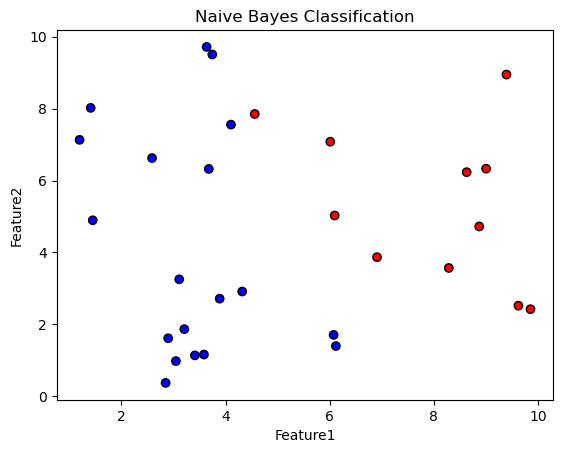

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate fictitious data
np.random.seed(42)
X = np.random.rand(100, 2) * 10
y = np.where(X[:, 0] + X[:, 1] > 10, 'Effect', 'No effect')

# Create DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

# Evaluate the model
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the points with predicted labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=np.where(y_pred == 'Effect', 'red', 'blue'), edgecolor='k', label='Test data')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Naive Bayes Classification')
plt.show()